In [21]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
import sys
sys.path.insert(0, '../cmds')
from treasury_cmds import *

#  HBS Case: The Information Content of the Yield Curve

# 1.1

## The Term Spread

1. What is the term spread?

Ans. The term spread is the difference between long-term and short-term interest rates, typically measured using government bond yields like the difference between 10 year and 3 month treasury rates.

2. What is the preferred measure of the term spread in the case?

Ans. The preferred measure is the 10-year Treasury bond yield minus the 3-month Treasury bill rate.

3. What evidence is cited for the term spread's power in predicting recessions?

Ans. Historical data shows inversions (negative spreads) of the 10y-3m spread have preceded every U.S. recession since 1950

4. Which is more important, the level of the term spread, its month-over-month change, or the level of short rates?

Ans. The level of the term spread is most important, as it directly signals market expectations and recession risk. Although, month-over-month change can become important when level of spreads are low.

Using the file yields.xlsx, calculate the term spread at the end of the sample.

In [22]:
import pandas as pd

yields = pd.read_excel("../data/yields.xlsx", sheet_name="yields", index_col=0)
end_term_spread = yields[10] - yields[1]
end_term_spread = end_term_spread.to_frame(name="Term Spread")

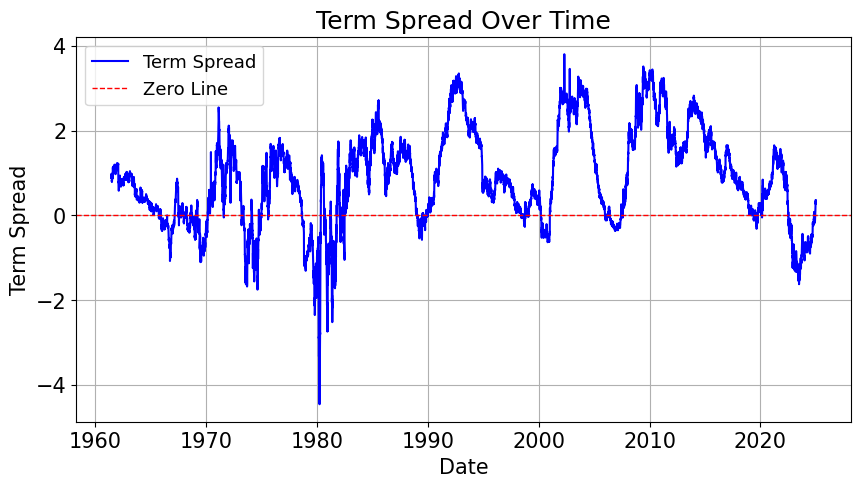

In [23]:
import matplotlib.pyplot as plt
# plot the term spread over time
plt.figure(figsize=(10, 5))
plt.plot(end_term_spread.index, end_term_spread["Term Spread"], linestyle='-', marker='', color='b', label="Term Spread")
plt.axhline(0, color='r', linestyle='--', linewidth=1, label="Zero Line")

plt.xlabel("Date")
plt.ylabel("Term Spread")
plt.title("Term Spread Over Time")
plt.legend()
plt.grid(True)
plt.show()

1. What does this term spread suggest about economic growth, according to the evidence of Estrella?

Ans. 
1. According to Estrella’s research, an inverted term spread predicts recessions, as it signals investor expectations of slower growth and potential rate cuts.
2. Since there is usually a lag between inversion and recession, the recent negative spread suggests a downturn may be coming soon.

# 1.2

## The Term Premia

1. What is the term premium? Why is it impossible to get a direct measure of it?

Ans.

The term premium is the extra yield investors demand to hold long-term bonds instead of rolling over short-term ones, compensating for risks like inflation or interest rate changes; it cannot be directly measured because it is a theoretical component of yields that must be estimated using models with assumptions about future rates and risk preferences.

2. Explain equations (1) and (2). Why does Sacks think this concept of the term spread complicates the relationship found by Estrella?

Ans.



### Equation 1
$$ i_t^{10} = \frac{1}{10} \sum_{j=0}^{9} E_t[i_{t+j}^{1}] + tp_t$$ 

- This equation states that the yield on a 10-year bond is equal to the average of expected future 1-year interest rates over the bond’s maturity period plus a term premium.

- If the term premium is zero, then long-term rates are purely driven by expectations of future short-term rates.
In reality, investors demand a risk premium for holding long-term bonds due to factors like inflation uncertainty and interest rate risk, which is why is usually positive.

### Equation 2
$$ i_t^{10} - i_t^{1}= \frac{10-j}{10} \sum_{j=1}^{9} E_t[\Delta i_{t+j}^{1}] + tp_t$$ 

- The LHS shows a term spread with a difference between long-term and short-term rates. the first term on RHS shows a weighted expected future changes and short-term interest rates.
- Thus, it shows us that the slope of the yield curve is an average of expeted changes in the short term rate plus the term premium.


- Sacks argues that incorporating the term premium into the term spread complicates the relationship found by Estrella because it introduces an additional factor beyond expectations of future short-term rates.
- Sacks highlights the role of the term premium, which can fluctuate due to factors like risk appetite, inflation uncertainty, and supply-demand dynamics in bond markets. This means that changes in the term spread may not always reflect future economic activity but could instead be driven by shifts in investors' risk preferences or external market conditions.

# 1.3

Though this case touches on monetary policy, that is not our focus. Rather, our focus is the degree to which the current shape of the yield curve is predictive of future short-term interest rates.

Suppose the term premium is zero. 
1. What does a downward-sloping yield curve predict about future short-term rates?
   
Ans. If the term premium is zero, a downward-sloping yield curve predicts that future short-term interest rates will decline.

2. In this case, is it risky to hold long-term bonds or short-term bonds? Is this risk compensated?

Ans. Long-term bonds are not necessarily riskier because if short-term rates decrease as expected, long-term bond prices will rise more than short-term bond prices due to their higher duration. However, since the term premium is zero, investors are not compensated for the additional interest rate risk, making short-term bonds relatively more attractive if rates are uncertain.


Suppose the term premium increases 5 percentage points.
1. What would change about your previous answer?

Ans. The term spread would increase, but this change would come from the higher term premium rather than from changes in expected short-term rates. If the yield curve remains downward-sloping despite the higher term premium, it implies that expectations for future short-term rates are even lower than before. Now, long-term bonds offer additional compensation for the increased term premium, but they also carry higher interest rate risk, so their relative attractiveness depends on investor risk tolerance.

# 2 Forward Curve from the Spot Curve

Use the data in `'../data/treasury_quotes_2024-10-31.xlsx`, focusing on the selected data found in the sheet `selected quotes`.

In [24]:
filepath = '../data/treasury_quotes_2024-10-31.xlsx'
quotes = pd.read_excel(filepath, sheet_name='selected quotes').set_index('KYTREASNO')
quotes['price'] = (quotes['bid'] + quotes['ask'])/2 + quotes['accrued int']
quotes

,type,quote date,issue date,maturity date,ttm,accrual fraction,cpn rate,bid,ask,price,accrued int,dirty price,ytm
KYTREASNO,,,,,,,,,,,,,
208042,note,2024-10-31,2023-04-30,2025-04-30,0.495551,0,3.875,99.712500,99.722203,99.717351,0,99.717351,0.044933
208129,note,2024-10-31,2023-10-31,2025-10-31,0.999316,0,5.000,100.641406,100.660819,100.651113,0,100.651113,0.043311
208213,note,2024-10-31,2024-04-30,2026-04-30,1.494867,0,4.875,100.929688,100.960938,100.945312,0,100.945312,0.042327
208302,note,2024-10-31,2024-10-31,2026-10-31,1.998631,0,4.125,99.933594,99.941406,99.937500,0,99.937500,0.041611
207875,note,2024-10-31,2022-04-30,2027-04-30,2.494182,0,2.750,96.750000,96.781250,96.765625,0,96.765625,0.041346
207960,note,2024-10-31,2022-10-31,2027-10-31,2.997947,0,4.125,99.992188,100.015625,100.003906,0,100.003906,0.041268
208044,note,2024-10-31,2023-04-30,2028-04-30,3.496235,0,3.500,97.902344,97.941406,97.921875,0,97.921875,0.041487
208132,note,2024-10-31,2023-10-31,2028-10-31,4.000000,0,4.875,102.585938,102.621094,102.603516,0,102.603516,0.041623
208216,note,2024-10-31,2024-04-30,2029-04-30,4.495551,0,4.625,101.894531,101.929688,101.912109,0,101.912109,0.041590


### 2.1 
Bootstrap the discount factor. 

Plot the answer in terms of discount factors and discount rates.

Though the time-to-maturity (ttm) is not spaced exactly at 6 months, for the purposes of this problem, you are welcome to approximate that they are spaced at exact 6-month intervals.



In [25]:
import pandas as pd
import numpy as np
from scipy.optimize import fsolve

def bootstrap_spot_rates(df):
    """
    Bootstraps spot rates from a dataframe of bond information.
    
    :param df: Pandas DataFrame with columns 'price', 'cpn rate', and 'ttm'
    :return: Pandas Series of spot rates indexed by TTM
    """
    # Ensure the DataFrame is sorted by TTM
    df = df.sort_values(by='ttm')
    
    # Initialize a dictionary to store spot rates
    spot_rates = {}

    # Iterate over each bond
    for index, row in df.iterrows():
        ttm, coupon_rate, price = row['ttm'], row['cpn rate'], row['price']
        cash_flows = [coupon_rate / 2] * round(ttm * 2)  # Semi-annual coupons
        cash_flows[-1] += 100  # Add the face value to the last cash flow

        # Function to calculate the present value of cash flows
        def pv_of_cash_flows(spot_rate):
            pv = 0
            for t in range(1, len(cash_flows) + 1):
                if t/2 in spot_rates:
                    rate = spot_rates[t/2]
                else:
                    rate = spot_rate
                pv += cash_flows[t - 1] / ((1 + rate / 2) ** t)
            return pv

        # Solve for the spot rate that sets the present value of cash flows equal to the bond price
        spot_rate_guess = (cash_flows[-1] / price) ** (1/(ttm*2)) - 1
        spot_rate = fsolve(lambda r: pv_of_cash_flows(r) - price, x0=spot_rate_guess)[0]

        # Store the calculated spot rate
        spot_rates[ttm] = spot_rate

    return pd.Series(spot_rates)

In [26]:
COMPOUNDING = 2

spot = pd.DataFrame(bootstrap_spot_rates(quotes))
spot.columns = ['rate']
spot['discount factor'] = intrate_to_discount(spot['rate'],spot.index,n_compound=COMPOUNDING)

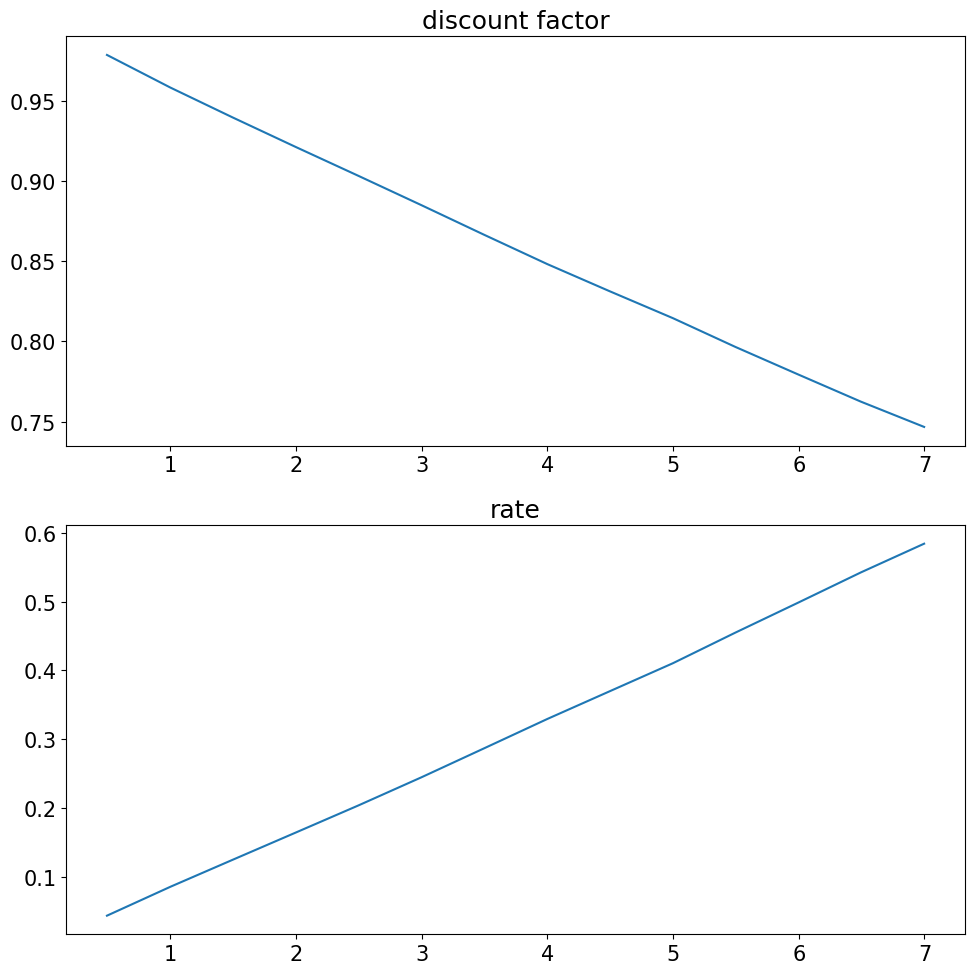

In [27]:
spot['rate'] = -np.log(spot['discount factor']) / spot.index.to_series().diff().mean()

fig, ax = plt.subplots(2,1,figsize=(10,10))
spot['discount factor'].plot(ax=ax[0],title='discount factor')
spot['rate'].plot(ax=ax[1],title='rate')
plt.tight_layout()
plt.show()


### 2.2
Calculate and plot the forward discount factors from $T$ to $T+0.5$, ranging $T$ from 0.5 through 6.5.



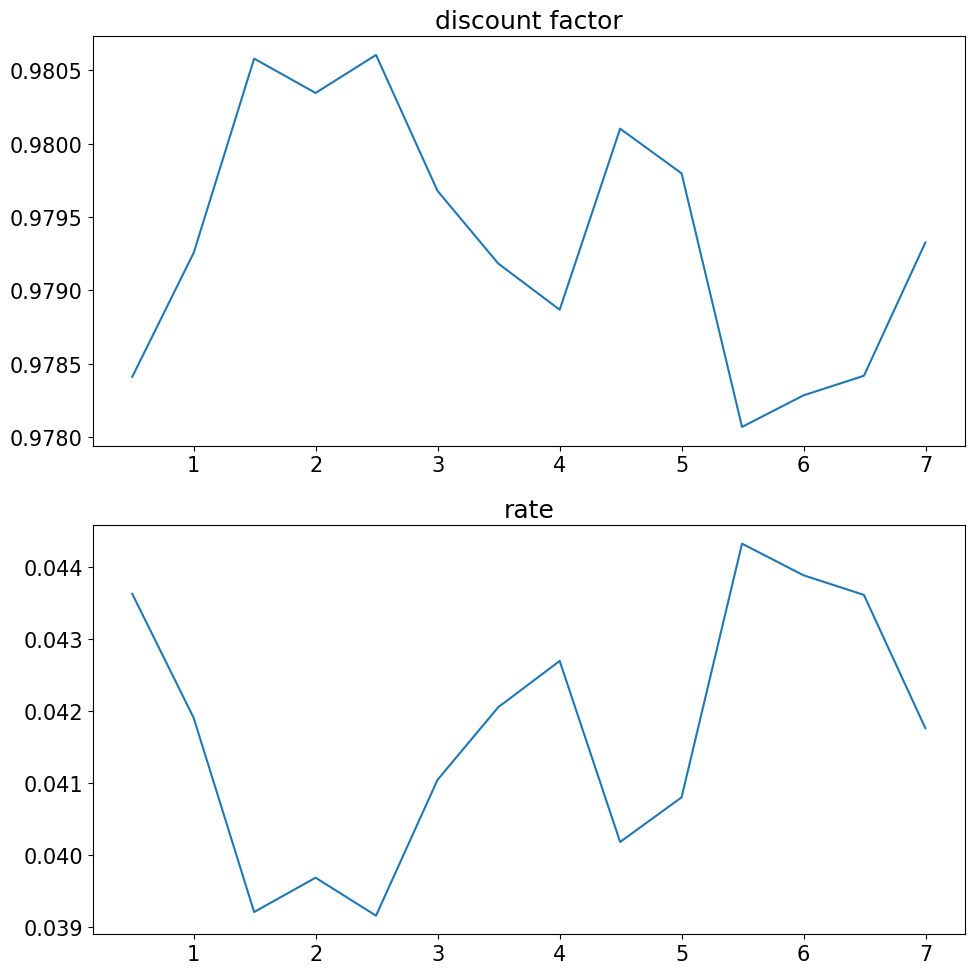

In [28]:
forward = pd.DataFrame(spot['discount factor']/spot['discount factor'].shift(),index=spot.index, columns=['discount factor'])
forward['discount factor'].iloc[0] = spot['discount factor'].iloc[0]
forward['rate'] = -np.log(forward['discount factor']) / forward.index.to_series().diff().mean()

fig, ax = plt.subplots(2,1,figsize=(10,10))
forward['discount factor'].plot(ax=ax[0],title='discount factor')
forward['rate'].plot(ax=ax[1],title='rate')
plt.tight_layout()
plt.show()


### 2.3
Use the forward discount factors to calculate the `semiannually` compounded forward **rates**.

Plot the curve.



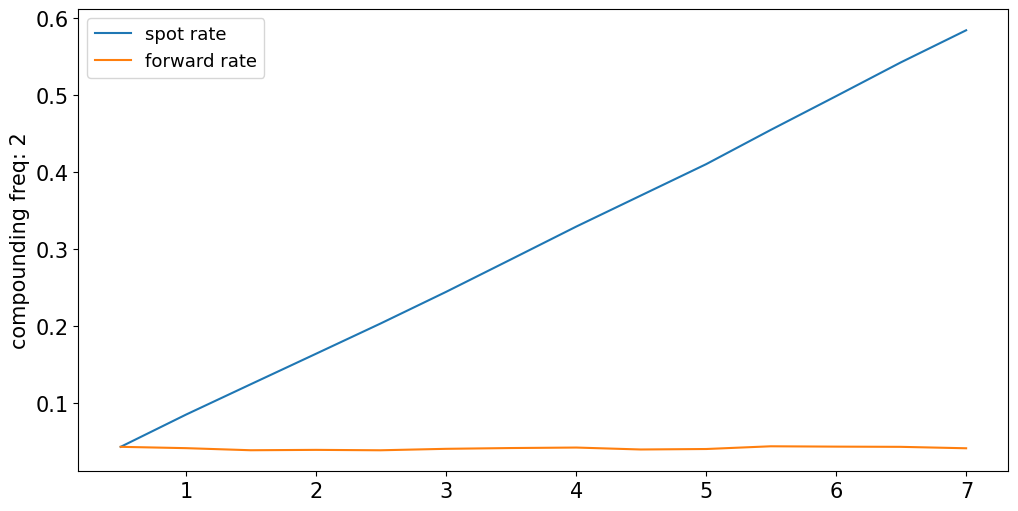

In [30]:
fig, ax = plt.subplots()
spot['rate'].plot(ax=ax)
forward['rate'].plot(ax=ax)
plt.legend(['spot rate','forward rate'])
plt.ylabel(f'compounding freq: {COMPOUNDING}')
plt.show()

#### 2.4

Specifically report the forward-rate values from 

* $T_1=0.5$ to $T_2=1$.
* $T_1=3.5$ to $T_2=4$.

In [31]:
T2list = [1,4]
for T2 in T2list:
    forwardrate = forward['rate'].iloc[int(T2*2)-1]
    print(f'The Forward Rate at {T2-.5} to {T2} is {forwardrate:.2%}')

The Forward Rate at 0.5 to 1 is 4.19%
The Forward Rate at 3.5 to 4 is 4.27%


***

# 3. Forward Discount Factors, Forward Rates, and Evolving Spot Rates

Use the data set `famabliss_strips_2024-12-31.xlsx`.

It gives prices on **zero coupon bonds** with maturities of 1 through 5 years.
* These are prices per $1 face value on bonds that only pay principal.
  
* Such bonds can be created from treasuries by stripping out their coupons.
  
* In essence, you can consider these prices as the discount factors $Z$, for maturity intervals 1 through 5 years.

In this problem, we focus on six dates: the month of `December` in `2020` through `2024`.

In [32]:
prices = pd.read_excel("../data/famabliss_strips_2024-12-31.xlsx", sheet_name='prices')  
prices['date'] = pd.to_datetime(prices['date'])
prices.head()

,date,1,2,3,4,5
0,1952-06-30,0.981778,0.962531,0.942467,0.926341,0.904183
1,1952-07-31,0.980948,0.960315,0.939312,0.923089,0.898516
2,1952-08-29,0.980578,0.959750,0.937819,0.921458,0.895717
3,1952-09-30,0.980312,0.959098,0.937551,0.920961,0.891676
4,1952-10-31,0.981108,0.959745,0.937583,0.919290,0.897248


### 3.1

For each of the dates, (`Dec 2020`, ..., `Dec 2024`), calculate the forward discount factor, $F(t,T_1,T_2)$, where $T_2 = T_1 + 1$ for $1\le T_1\le 4$.

Make a plot of the curve $F$ at each of these six dates.

In [33]:
def filter_month_data(df, years, month=12) :
    mask = df['date'].dt.year.isin(years) & (df['date'].dt.month == month)
    df_filtered = df.loc[mask].copy()    
    df_filtered.sort_values('date', inplace=True)
    return df_filtered

years = [2020, 2021, 2022, 2023, 2024]
df = filter_month_data(prices, years, 12).set_index('date')
df

,1,2,3,4,5
date,,,,,
2020-12-31,0.998959,0.997520,0.995299,0.989455,0.981537
2021-12-31,0.996173,0.985500,0.971251,0.954872,0.938668
2022-12-30,0.954636,0.916229,0.883347,0.851046,0.820298
2023-12-29,0.953787,0.919644,0.888523,0.856672,0.826740
2024-12-31,0.959864,0.919585,0.880687,0.841768,0.804591


,2,3,4,5
date,,,,
2020-12-31,0.998560,0.997773,0.994129,0.991997
2021-12-31,0.989286,0.985541,0.983136,0.983031
2022-12-30,0.959768,0.964111,0.963434,0.963870
2023-12-29,0.964203,0.966159,0.964153,0.965059
2024-12-31,0.958037,0.957701,0.955808,0.955836


<Axes: title={'center': 'Forward Discount Factor Curves (Dec 2020 - Dec 2024)'}, xlabel='Maturity T1 (years)', ylabel='Forward Discount Factor F(t, T1, T1+1)'>

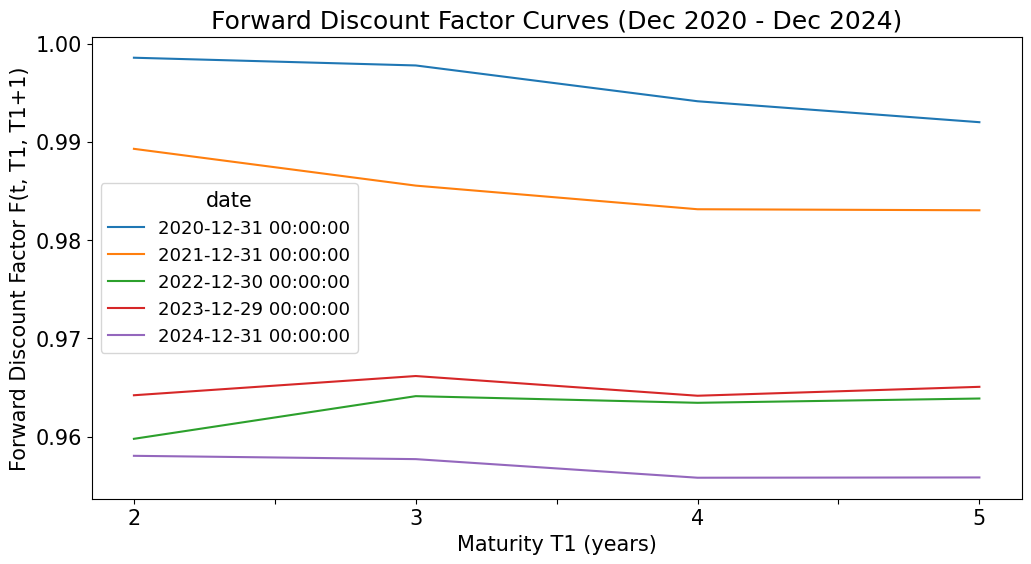

In [34]:
def calculate_forward_discount_factors(df):
    F = df[list(df.columns)[1:]] / df[(df.columns)[:-1]].values
    return F 
F = calculate_forward_discount_factors(df)
display(F)
F.T.plot(xlabel="Maturity T1 (years)", 
         ylabel="Forward Discount Factor F(t, T1, T1+1)", 
         title="Forward Discount Factor Curves (Dec 2020 - Dec 2024)")

### 3.2



Use $F$ above to calculate the continuously compounded forward rates, $f$, on each date.

Make a plot of the curve, $f$, at each of these dates.

In [35]:

def calclate_spot_rate(df):
    spot = -np.log(df)/df.columns
    return spot
spot = calclate_spot_rate(df)
spot

,1,2,3,4,5
date,,,,,
2020-12-31,0.001042,0.001242,0.001571,0.00265,0.003727
2021-12-31,0.003834,0.007303,0.009724,0.011545,0.012659
2022-12-30,0.046425,0.043744,0.041346,0.040322,0.039618
2023-12-29,0.047314,0.041884,0.039398,0.038675,0.038053
2024-12-31,0.040964,0.041916,0.042351,0.043063,0.043484


,1,2,3,4,5
date,,,,,
2020-12-31,0.001042,0.001441,0.002229,0.005889,0.008035
2021-12-31,0.003834,0.010772,0.014564,0.017008,0.017115
2022-12-30,0.046425,0.041064,0.036548,0.037252,0.036799
2023-12-29,0.047314,0.036454,0.034427,0.036505,0.035566
2024-12-31,0.040964,0.042869,0.043220,0.045199,0.045169


<Axes: title={'center': 'Continuously Compounded Forward Rate Curves (Dec 2020 - Dec 2024)'}, xlabel='Maturity T1 (years)', ylabel='Continuously Compounded Forward Rate'>

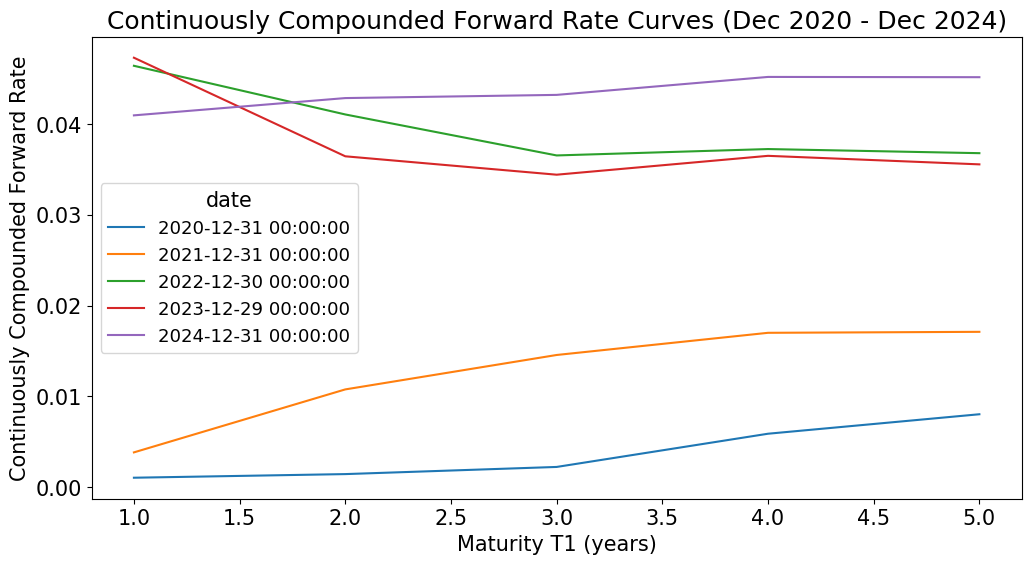

In [36]:
def calculate_continuous_forward_rates(df, spot, F):
    fwd_rates = -np.log(F)
    fwd_rates.insert(0,1,spot[1])
    return fwd_rates
f = calculate_continuous_forward_rates(df, spot, F)
display(f)
f.T.plot(xlabel="Maturity T1 (years)", 
         ylabel="Continuously Compounded Forward Rate", 
         title="Continuously Compounded Forward Rate Curves (Dec 2020 - Dec 2024)")

### 3.3

Calculate the continuously compounded spot rates, $r$, at these dates.

Plot both the forward curve and the spot curve on the date of `Dec 2020`.

Recall that $f(t,t,t+1) = r(t,t+1)$.

<Axes: title={'center': 'Continuously Compounded Forward Rate Curves (Dec 2020 - Dec 2024)'}, xlabel='Maturity T1 (years)', ylabel='Continuously Compounded  Spot Rate'>

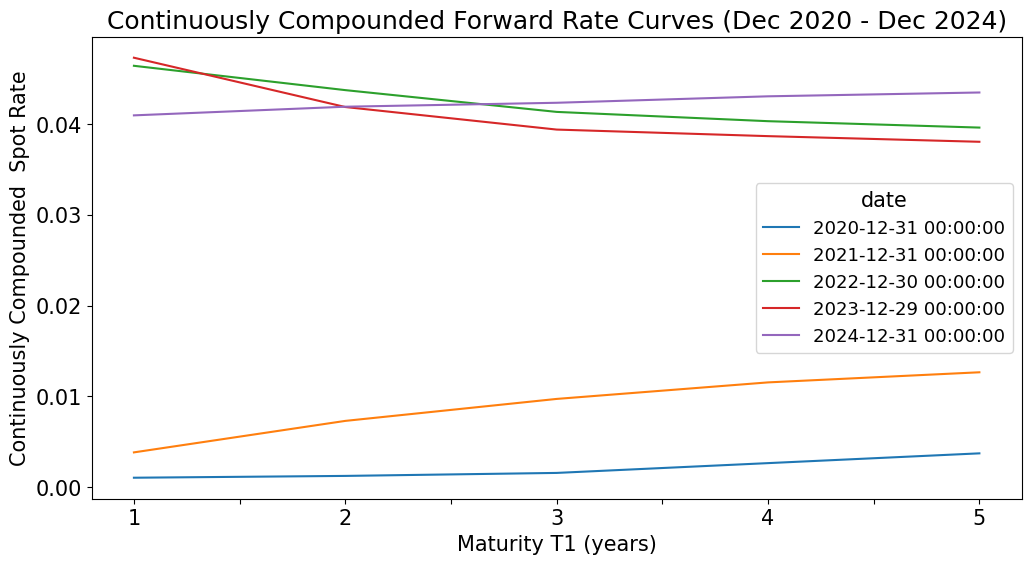

In [37]:
spot.T.plot(xlabel="Maturity T1 (years)", 
            ylabel="Continuously Compounded  Spot Rate", 
            title="Continuously Compounded Forward Rate Curves (Dec 2020 - Dec 2024)")

Continuously Compounded Forward Rate - December 2020


,1,2,3,4,5
date,,,,,
2020-12-31,0.001042,0.001441,0.002229,0.005889,0.008035


Continuously Compounded Spot Rate - December 2020


,1,2,3,4,5
date,,,,,
2020-12-31,0.001042,0.001242,0.001571,0.00265,0.003727


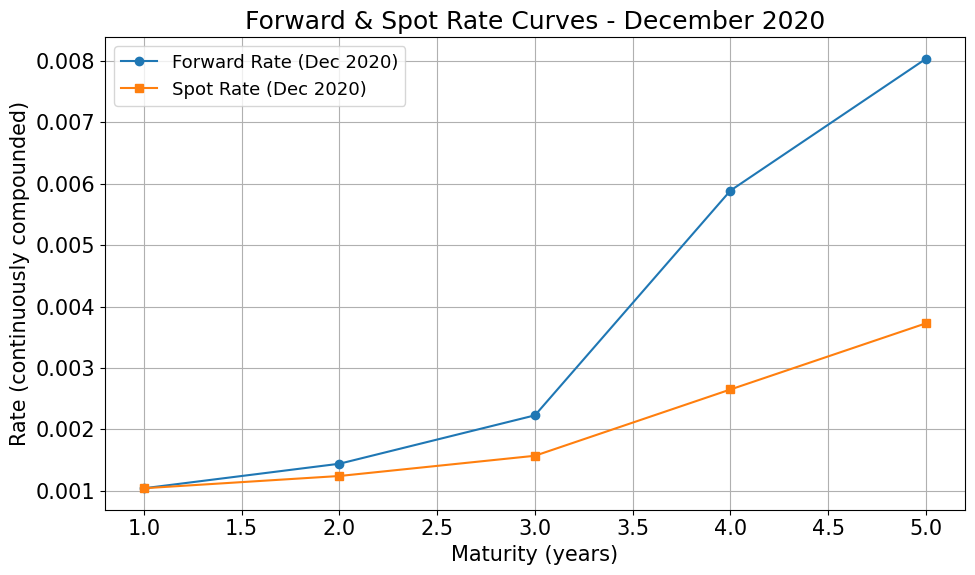

In [38]:
print("Continuously Compounded Forward Rate - December 2020")
display(f.loc['2020'])
print("Continuously Compounded Spot Rate - December 2020")
display(spot.loc['2020'])

plt.figure(figsize=(10, 6))
maturities = list(spot.columns)

plt.plot(maturities, f.loc['2020-12-31'], marker='o', label='Forward Rate (Dec 2020)')
plt.plot(maturities, spot.loc['2020-12-31'], marker='s', label='Spot Rate (Dec 2020)')

plt.xlabel("Maturity (years)")
plt.ylabel("Rate (continuously compounded)")
plt.title("Forward & Spot Rate Curves - December 2020")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.4

Plot the forward curve on `Dec 2020` against the time-series evolution of $r(t,t+1)$ for dates $t$ between `Dec 2020` and `Dec 2024`.

How does the evolution of one-year rates between `2020-2024` compare to the forward rates of `2020`?

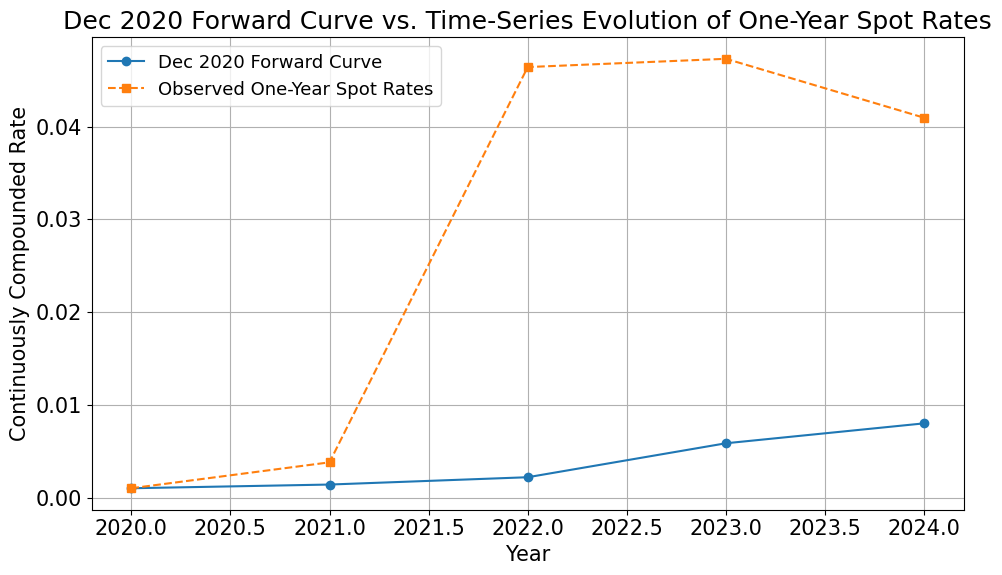

In [39]:
DATE = '2020-12-31'
temp = f.loc[DATE].T.copy()
temp.index = temp.index.astype(int)  
temp.name = 'Forward Curve'
temp = temp.to_frame()  

spot_over_time = spot[1].copy()
spot_over_time.index = spot_over_time.index.year
years = [2020, 2021, 2022, 2023, 2024]
temp.index = years
temp['Spot over Time'] = spot_over_time.loc[years].values

plt.figure(figsize=(10, 6))
plt.plot(temp.index, temp['Forward Curve'], marker='o', linestyle='-', label='Dec 2020 Forward Curve')
plt.plot(temp.index, temp['Spot over Time'], marker='s', linestyle='--', label='Observed One-Year Spot Rates')
plt.xlabel("Year")
plt.ylabel("Continuously Compounded Rate")
plt.title("Dec 2020 Forward Curve vs. Time-Series Evolution of One-Year Spot Rates")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

Clearly, in this particular scenario, the forward rates were way too conservative to describe the one-year spot rates. The one-year spot rates were higher than expected. This was particularly because of the economic scenario that pushed up the interest rates.

***